# Credit_modelling_real_example from a bank


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import copy

In [126]:
data0 = pd.read_excel('Base_IAP3.xlsx')

In [127]:
data = copy.copy(data0)

In [128]:
data.columns

Index(['Código', 'Atividade Econômica', 'CNAE', 'Data Início Relacionamento',
       'Escolaridade', 'Estado Civil', 'Idade', 'Profissão',
       'Renda Bruta Mensal', 'Vínculo Empregatício', 'Sexo',
       'Sigla Tipo Pessoa', 'Tipo Renda', 'Valor Bem Imóvel',
       'Valor Bem Móvel', 'Quantidade Dependentes', 'Nome PA',
       'Possui Telefone?', 'Valor Saldo Cliente Conta Capital Diário',
       'Quantidade Contratos Vigentes',
       'Valor Limite Conta Cartão Contratado Diário Cliente Cartão',
       'Quantidade Cota Ativa Cliente Consórcio',
       'Valor Saldo Final Cliente Poupança', 'Valor Saldo Diário Cliente LCA',
       'Valor Saldo Diário Cliente RDC', 'Valor Saldo Diário Cliente LCI',
       'Quantidade Seguro Vigente', 'Valor Contribuição Cliente Previ',
       'Indicador Acesso Mobile Banking', 'Quantidade Contas',
       'Situação Conta Corrente', 'Possui Débito Automático',
       'Valor Saldo Depósito Conta Corrente',
       'Valor Limite Credito Contratato', 'Descr

In [129]:
# Aqui constam 13 das 19 variáveis a serem consideradas no estudo. OBS: As demais são categóricas
lista = ['Renda Bruta Mensal','Valor Bem Imóvel','Valor Bem Móvel',
         'Valor Saldo Cliente Conta Capital Diário','Quantidade Contratos Vigentes',
         'Valor Limite Conta Cartão Contratado Diário Cliente Cartão',
         'Valor Saldo Final Cliente Poupança',
         'Valor Saldo Diário Cliente RDC', 'Quantidade Seguro Vigente','Valor Limite Credito Contratato',
       'Valor Saldo Devedor Diário', 'Saldo Devedor (Empréstimo Pessoal)',
       'Quantidade Instituicao Financeira', 
       'Valor Risco Sicoob','Valor Vencido SFN','Valor Prejuizo SFN',
       'Valor Saldo Devedor SFN', 'Comprometimento de Renda']

for i in lista:
    data[i] = np.log(data[i]+1)


In [130]:
data['Renda Bruta Mensal']

0         9.435109
1         0.000000
2         7.131699
3         6.908755
4         0.000000
            ...   
120389    6.952729
120390    7.719130
120391    8.361164
120392    0.000000
120393    9.081453
Name: Renda Bruta Mensal, Length: 120394, dtype: float64

##### Variáveis Categóricas: 
- Escolaridade, 
- Estado Civil, 
- Idade, 
- Sexo, 
- Tipo Renda, 
- Nome PA,
- Possui Telefone?
- Indicador Acesso Mobile Banking'
- 'Possui Débito Automático'

In [131]:
# VARIÁVEL IDADE) DISCRETIZADA EM 3 FAIXAS
Idade_qcut_3 = pd.qcut(data['Idade'],3)
data['Idade'] = Idade_qcut_3

In [132]:
data['Idade']

0         (-0.001, 31.0]
1          (50.0, 121.0]
2          (50.0, 121.0]
3          (50.0, 121.0]
4           (31.0, 50.0]
               ...      
120389      (31.0, 50.0]
120390      (31.0, 50.0]
120391     (50.0, 121.0]
120392     (50.0, 121.0]
120393     (50.0, 121.0]
Name: Idade, Length: 120394, dtype: category
Categories (3, interval[float64]): [(-0.001, 31.0] < (31.0, 50.0] < (50.0, 121.0]]

In [133]:
data = data[(data['Saldo Devedor (Empréstimo Pessoal)']>0) &(data['Atividade Econômica']=='PESSOA FISICA') & (data['Valor Saldo Cliente Conta Capital Diário'] !=0)]

In [134]:
base = data[['Código', 'Atividade Econômica', 'CNAE', 'Data Início Relacionamento',
       'Escolaridade', 'Estado Civil', 'Idade', 'Profissão',
       'Renda Bruta Mensal', 'Vínculo Empregatício', 'Sexo',
       'Sigla Tipo Pessoa', 'Tipo Renda', 'Valor Bem Imóvel',
       'Valor Bem Móvel', 'Quantidade Dependentes', 'Nome PA',
       'Possui Telefone?', 'Valor Saldo Cliente Conta Capital Diário',
       'Quantidade Contratos Vigentes',
       'Valor Limite Conta Cartão Contratado Diário Cliente Cartão',
       'Quantidade Cota Ativa Cliente Consórcio',
       'Valor Saldo Final Cliente Poupança', 'Valor Saldo Diário Cliente LCA',
       'Valor Saldo Diário Cliente RDC', 'Valor Saldo Diário Cliente LCI',
       'Quantidade Seguro Vigente', 'Valor Contribuição Cliente Previ',
       'Indicador Acesso Mobile Banking', 'Quantidade Contas',
       'Situação Conta Corrente', 'Possui Débito Automático',
       'Valor Saldo Depósito Conta Corrente',
       'Valor Limite Credito Contratato', 'Descrição Nivel Risco CRL',
       'Nivel Risco Cliente', 'Nivel Risco Cliente SFN',
       'Valor Saldo Devedor Diário', 'Saldo Devedor (Empréstimo Pessoal)',
       'Valor Saldo Devedor Diário INAD 15',
       'Valor Saldo Devedor Diário INAD 90',
       'Quantidade Instituicao Financeira',
       'Quantidade Operacao Credito Sicoob', 'Quantidade Operacao Credito SFN',
       'Valor A Vencer Sicoob', 'Valor A Vencer SFN',
       'Valor A Vencer Ate 360 Dias SFN', 'Valor Credito a Liberar Sicoob',
       'Valor Risco Sicoob','Valor Vencido SFN','Valor Prejuizo SFN',
       'Valor Saldo Devedor SFN', 'Comprometimento de Renda']]

In [135]:
for i in base.columns:
    print(base[i].isnull().value_counts())

False    2698
Name: Código, dtype: int64
False    2698
Name: Atividade Econômica, dtype: int64
False    2698
Name: CNAE, dtype: int64
False    2698
Name: Data Início Relacionamento, dtype: int64
False    2698
Name: Escolaridade, dtype: int64
False    2698
Name: Estado Civil, dtype: int64
False    2698
Name: Idade, dtype: int64
False    2698
Name: Profissão, dtype: int64
False    2698
Name: Renda Bruta Mensal, dtype: int64
False    2698
Name: Vínculo Empregatício, dtype: int64
False    2698
Name: Sexo, dtype: int64
False    2698
Name: Sigla Tipo Pessoa, dtype: int64
False    2698
Name: Tipo Renda, dtype: int64
False    2698
Name: Valor Bem Imóvel, dtype: int64
False    2698
Name: Valor Bem Móvel, dtype: int64
False    2698
Name: Quantidade Dependentes, dtype: int64
False    2698
Name: Nome PA, dtype: int64
False    2698
Name: Possui Telefone?, dtype: int64
False    2698
Name: Valor Saldo Cliente Conta Capital Diário, dtype: int64
False    2698
Name: Quantidade Contratos Vigentes, dtype:

In [136]:
# base.drop('Saldo Devedor (Empréstimo Pessoal)',axis=1, inplace=True)


In [137]:
linhas = base.loc[base['Comprometimento de Renda'].isnull()].index
linhas
base.drop(linhas,axis=0, inplace=True)

In [138]:
linhas = base.loc[base['Indicador Acesso Mobile Banking'].isnull()].index
linhas
base.drop(linhas,axis=0, inplace=True)

In [139]:
R = base['Descrição Nivel Risco CRL']

In [140]:
base.drop('Descrição Nivel Risco CRL',axis=1, inplace=True)

In [141]:
linhas = base.loc[base['Valor Limite Credito Contratato'].isnull()].index
linhas
base.drop(linhas,axis=0, inplace=True)

In [142]:
# Número de contas a serem investigadas: 2697
base.shape[0]

2687

In [143]:
for i in base.columns:
    print(base[i].isnull().value_counts())

False    2687
Name: Código, dtype: int64
False    2687
Name: Atividade Econômica, dtype: int64
False    2687
Name: CNAE, dtype: int64
False    2687
Name: Data Início Relacionamento, dtype: int64
False    2687
Name: Escolaridade, dtype: int64
False    2687
Name: Estado Civil, dtype: int64
False    2687
Name: Idade, dtype: int64
False    2687
Name: Profissão, dtype: int64
False    2687
Name: Renda Bruta Mensal, dtype: int64
False    2687
Name: Vínculo Empregatício, dtype: int64
False    2687
Name: Sexo, dtype: int64
False    2687
Name: Sigla Tipo Pessoa, dtype: int64
False    2687
Name: Tipo Renda, dtype: int64
False    2687
Name: Valor Bem Imóvel, dtype: int64
False    2687
Name: Valor Bem Móvel, dtype: int64
False    2687
Name: Quantidade Dependentes, dtype: int64
False    2687
Name: Nome PA, dtype: int64
False    2687
Name: Possui Telefone?, dtype: int64
False    2687
Name: Valor Saldo Cliente Conta Capital Diário, dtype: int64
False    2687
Name: Quantidade Contratos Vigentes, dtype:

In [144]:
base.columns

Index(['Código', 'Atividade Econômica', 'CNAE', 'Data Início Relacionamento',
       'Escolaridade', 'Estado Civil', 'Idade', 'Profissão',
       'Renda Bruta Mensal', 'Vínculo Empregatício', 'Sexo',
       'Sigla Tipo Pessoa', 'Tipo Renda', 'Valor Bem Imóvel',
       'Valor Bem Móvel', 'Quantidade Dependentes', 'Nome PA',
       'Possui Telefone?', 'Valor Saldo Cliente Conta Capital Diário',
       'Quantidade Contratos Vigentes',
       'Valor Limite Conta Cartão Contratado Diário Cliente Cartão',
       'Quantidade Cota Ativa Cliente Consórcio',
       'Valor Saldo Final Cliente Poupança', 'Valor Saldo Diário Cliente LCA',
       'Valor Saldo Diário Cliente RDC', 'Valor Saldo Diário Cliente LCI',
       'Quantidade Seguro Vigente', 'Valor Contribuição Cliente Previ',
       'Indicador Acesso Mobile Banking', 'Quantidade Contas',
       'Situação Conta Corrente', 'Possui Débito Automático',
       'Valor Saldo Depósito Conta Corrente',
       'Valor Limite Credito Contratato', 'Nivel

In [145]:
base.dtypes

Código                                                           int64
Atividade Econômica                                             object
CNAE                                                            object
Data Início Relacionamento                                      object
Escolaridade                                                    object
Estado Civil                                                    object
Idade                                                         category
Profissão                                                       object
Renda Bruta Mensal                                             float64
Vínculo Empregatício                                            object
Sexo                                                            object
Sigla Tipo Pessoa                                               object
Tipo Renda                                                      object
Valor Bem Imóvel                                               float64
Valor 

In [146]:
# Variáveis Categóricas
columns_cat = ['Atividade Econômica','Idade'
           'Escolaridade', 
           'Estado Civil',
           'Vínculo Empregatício', 
           'Sexo', 
           'Tipo Renda', 
           'Nome PA', 
           'Possui Telefone?',
           'Indicador Acesso Mobile Banking', 
           'Possui Débito Automático',
            ]

In [147]:
columns_tranf_bin = ['Valor Saldo Devedor Diário INAD 90']

In [148]:
id = base['Código']
id

45            46
61            62
118          119
186          187
238          239
           ...  
120232    120233
120340    120341
120359    120360
120366    120367
120381    120382
Name: Código, Length: 2687, dtype: int64

In [149]:
for i in columns_tranf_bin:
    base.loc[base[i]!=0,i] = 1

In [150]:
lista_maus = base.loc[base['Valor Saldo Devedor Diário INAD 90']>0,'Valor Saldo Devedor Diário INAD 90']
lista_bons = base.loc[base['Valor Saldo Devedor Diário INAD 90']==0,'Valor Saldo Devedor Diário INAD 90']

# Todas as variáveis a serem consideradas

In [151]:
base_onehot = base[[
       'Escolaridade', 'Estado Civil', 'Idade',
       'Sexo', 'Tipo Renda', 'Possui Telefone?',
        'Indicador Acesso Mobile Banking',
        'Possui Débito Automático', 'Comprometimento de Renda',
        'Renda Bruta Mensal','Valor Bem Imóvel', 'Valor Bem Móvel',
        'Quantidade Contratos Vigentes',
        'Valor Saldo Cliente Conta Capital Diário',
       'Valor Limite Conta Cartão Contratado Diário Cliente Cartão',
       'Valor Saldo Final Cliente Poupança', 
       'Valor Saldo Diário Cliente RDC',
       'Quantidade Seguro Vigente', 
       'Valor Limite Credito Contratato',
        'Saldo Devedor (Empréstimo Pessoal)',
       'Quantidade Instituicao Financeira', 
       'Valor Risco Sicoob','Valor Vencido SFN','Valor Prejuizo SFN','Valor Saldo Devedor Diário INAD 90']]

In [152]:
base_onehot.columns

Index(['Escolaridade', 'Estado Civil', 'Idade', 'Sexo', 'Tipo Renda',
       'Possui Telefone?', 'Indicador Acesso Mobile Banking',
       'Possui Débito Automático', 'Comprometimento de Renda',
       'Renda Bruta Mensal', 'Valor Bem Imóvel', 'Valor Bem Móvel',
       'Quantidade Contratos Vigentes',
       'Valor Saldo Cliente Conta Capital Diário',
       'Valor Limite Conta Cartão Contratado Diário Cliente Cartão',
       'Valor Saldo Final Cliente Poupança', 'Valor Saldo Diário Cliente RDC',
       'Quantidade Seguro Vigente', 'Valor Limite Credito Contratato',
       'Saldo Devedor (Empréstimo Pessoal)',
       'Quantidade Instituicao Financeira', 'Valor Risco Sicoob',
       'Valor Vencido SFN', 'Valor Prejuizo SFN',
       'Valor Saldo Devedor Diário INAD 90'],
      dtype='object')

In [153]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder_banco = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(), [0,1,2,3,4,5,6,7])], remainder='passthrough')

In [154]:
X = onehotencoder_banco.fit_transform(base_onehot)
variaveis = onehotencoder_banco.get_feature_names()
variaveis

['OneHot__x0_4ª SÉRIE COMPLETA DO ENSINO FUNDAMENTAL',
 'OneHot__x0_ATÉ 4ª SÉRIE INCOMPLETA DO ENSINO FUNDAMENTAL',
 'OneHot__x0_DA 5ª À 8ª SÉRIE DO ENSINO FUNDAMENTAL',
 'OneHot__x0_EDUCAÇÃO SUPERIOR COMPLETA',
 'OneHot__x0_EDUCAÇÃO SUPERIOR INCOMPLETA',
 'OneHot__x0_ENSINO FUNDAMENTAL COMPLETO (ANTIGO 1º GRAU)',
 'OneHot__x0_ENSINO MÉDIO COMPLETO (ANTIGO 2º GRAU)',
 'OneHot__x0_ENSINO MÉDIO INCOMPLETO (ANTIGO 2º GRAU)',
 'OneHot__x0_NÃO ALFABETIZADO',
 'OneHot__x0_NÃO INFORMADO',
 'OneHot__x0_PÓS-GRADUAÇÃO / MESTRADO / DOUTORADO',
 'OneHot__x1_CASADO(A)',
 'OneHot__x1_DIVORCIADO(A)',
 'OneHot__x1_SEPARADO(A)/DESQUITADO(A)',
 'OneHot__x1_SOLTEIRO(A)',
 'OneHot__x1_UNIÃO ESTAVEL',
 'OneHot__x1_VIÚVO(A)',
 'OneHot__x2_(-0.001, 31.0]',
 'OneHot__x2_(31.0, 50.0]',
 'OneHot__x2_(50.0, 121.0]',
 'OneHot__x3_F',
 'OneHot__x3_M',
 'OneHot__x4_AGROPECUÁRIA',
 'OneHot__x4_APOSENTADORIA',
 'OneHot__x4_DECLARAÇÃO DE RENDA',
 'OneHot__x4_EXTRATOS DE CONTA CORRENTE',
 'OneHot__x4_MESADA',
 'OneHot_

# Conjunto de Teste e Treinamento para modelos com 3 clusters

In [155]:
y = X[:,-1]
y.shape

(2687,)

In [156]:
X_variaveis = X[:,:-1]
X_variaveis = pd.DataFrame(X_variaveis)
X_variaveis.columns = variaveis[0:X_variaveis.shape[1]]

In [157]:
X_variaveis

,OneHot__x0_4ª SÉRIE COMPLETA DO ENSINO FUNDAMENTAL,OneHot__x0_ATÉ 4ª SÉRIE INCOMPLETA DO ENSINO FUNDAMENTAL,OneHot__x0_DA 5ª À 8ª SÉRIE DO ENSINO FUNDAMENTAL,OneHot__x0_EDUCAÇÃO SUPERIOR COMPLETA,OneHot__x0_EDUCAÇÃO SUPERIOR INCOMPLETA,OneHot__x0_ENSINO FUNDAMENTAL COMPLETO (ANTIGO 1º GRAU),OneHot__x0_ENSINO MÉDIO COMPLETO (ANTIGO 2º GRAU),OneHot__x0_ENSINO MÉDIO INCOMPLETO (ANTIGO 2º GRAU),OneHot__x0_NÃO ALFABETIZADO,OneHot__x0_NÃO INFORMADO,...,Valor Limite Conta Cartão Contratado Diário Cliente Cartão,Valor Saldo Final Cliente Poupança,Valor Saldo Diário Cliente RDC,Quantidade Seguro Vigente,Valor Limite Credito Contratato,Saldo Devedor (Empréstimo Pessoal),Quantidade Instituicao Financeira,Valor Risco Sicoob,Valor Vencido SFN,Valor Prejuizo SFN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.392745,0.000000,0.000000,1.609438,9.210440,10.055849,1.386294,11.078324,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.716208,0.000000,0.000000,0.693147,5.707110,7.851805,1.609438,9.130593,0.000000,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,10.192133,0.000000,0.000000,8.517393,10.820946,1.609438,10.945889,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,7.313887,7.666845,1.098612,8.236248,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,7.313887,0.000000,0.000000,1.098612,6.216606,9.609303,1.386294,9.656475,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.006701,4.627812,5.343243,0.000000,6.216606,8.329506,1.609438,8.487563,0.000000,0.0
2683,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.615872,0.000000,3.135059,0.000000,6.908755,9.943887,1.609438,6.908755,0.000000,0.0
2684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.989899,0.000000,0.000000,0.000000,6.216606,9.157920,2.197225,9.231092,4.648517,0.0
2685,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,6.908755,9.307669,1.609438,9.449979,0.000000,0.0


In [158]:
X = X_variaveis
import pandas as pd
import numpy as np
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.5, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  Valor Vencido SFN              with p-value 4.42936e-84
Add  Valor Limite Conta Cartão Contratado Diário Cliente Cartão with p-value 1.19053e-18
Add  OneHot__x1_SOLTEIRO(A)         with p-value 6.68631e-05
Add  OneHot__x6_NÃO                 with p-value 2.66116e-05
Add  Quantidade Contratos Vigentes  with p-value 2.15338e-05
Add  Comprometimento de Renda       with p-value 5.01439e-05
Add  OneHot__x0_DA 5ª À 8ª SÉRIE DO ENSINO FUNDAMENTAL with p-value 0.000989997
Add  Quantidade Seguro Vigente      with p-value 0.00077292
Add  OneHot__x2_(-0.001, 31.0]      with p-value 0.0239246
resulting features:
['Valor Vencido SFN', 'Valor Limite Conta Cartão Contratado Diário Cliente Cartão', 'OneHot__x1_SOLTEIRO(A)', 'OneHot__x6_NÃO', 'Quantidade Contratos Vigentes', 'Comprometimento de Renda', 'OneHot__x0_DA 5ª À 8ª SÉRIE DO ENSINO FUNDAMENTAL', 'Quantidade Seguro Vigente', 'OneHot__x2_(-0.001, 31.0]']


In [159]:
X['const'] = np.ones(X.shape[0])

In [160]:
result2 = ['const','Valor Vencido SFN',
 'Valor Limite Conta Cartão Contratado Diário Cliente Cartão',
 'OneHot__x1_SOLTEIRO(A)',
 'Quantidade Seguro Vigente',
 'OneHot__x2_(-0.001, 31.0]']

In [161]:
X[result2].corr()

,const,Valor Vencido SFN,Valor Limite Conta Cartão Contratado Diário Cliente Cartão,OneHot__x1_SOLTEIRO(A),Quantidade Seguro Vigente,"OneHot__x2_(-0.001, 31.0]"
const,NaN,NaN,NaN,NaN,NaN,NaN
Valor Vencido SFN,NaN,1.000000,-0.293534,0.042161,-0.063094,0.043271
Valor Limite Conta Cartão Contratado Diário Cliente Cartão,NaN,-0.293534,1.000000,-0.057859,0.183937,-0.082329
OneHot__x1_SOLTEIRO(A),NaN,0.042161,-0.057859,1.000000,-0.172594,0.527693
Quantidade Seguro Vigente,NaN,-0.063094,0.183937,-0.172594,1.000000,-0.143392
"OneHot__x2_(-0.001, 31.0]",NaN,0.043271,-0.082329,0.527693,-0.143392,1.000000


In [162]:
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X[result2] , y, test_size = p, random_state = 2)

# Regressão Logística

In [163]:
import statsmodels.api as sm
glm_binom = sm.GLM(y_train, x_train, family=sm.families.Binomial())
res = glm_binom.fit()
ajustado = res.predict()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2149
Model:                            GLM   Df Residuals:                     2143
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38.278
Date:                Tue, 28 Sep 2021   Deviance:                       76.556
Time:                        14:27:47   Pearson chi2:                     176.
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [164]:
res.params.values

array([-11.1342702 ,   1.20738541,  -0.47189528,   1.40012941,
        -3.32957599,   1.3263033 ])

In [165]:
np.exp(res.params.values)

array([1.46031952e-05, 3.34472813e+00, 6.23818835e-01, 4.05572478e+00,
       3.58082848e-02, 3.76709182e+00])

TRAIN: [ 536  537  538 ... 2684 2685 2686] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

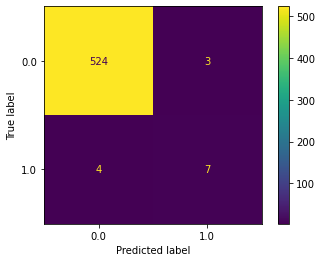

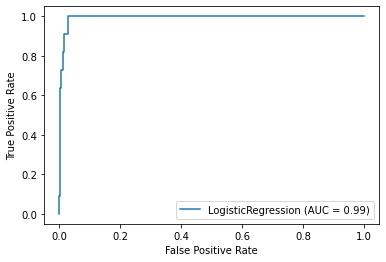

TRAIN: [   0    1    2 ... 2684 2685 2686] TEST: [ 536  537  538  539  540  541  542  543  544  545  546  547  548  549
  550  551  552  553  554  555  556  557  558  559  560  561  562  563
  564  565  566  567  568  569  570  571  572  573  574  575  576  577
  578  579  580  581  582  583  584  585  586  587  588  589  590  591
  592  593  594  595  596  597  598  599  600  601  602  603  604  605
  606  607  608  609  610  611  612  613  614  615  616  617  618  619
  620  621  622  623  624  625  626  627  628  629  630  631  632  633
  634  635  636  637  638  639  640  641  642  644  645  646  647  648
  649  650  651  652  653  654  655  656  657  658  659  660  661  662
  663  664  665  666  667  668  669  670  671  672  673  674  675  676
  677  678  679  680  681  682  683  684  686  687  688  689  690  691
  692  693  694  695  696  697  698  699  700  701  702  703  704  705
  706  707  708  709  710  711  712  713  714  715  716  717  718  719
  720  721  722  723  724  7

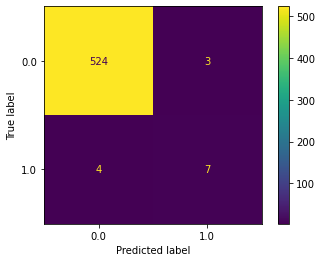

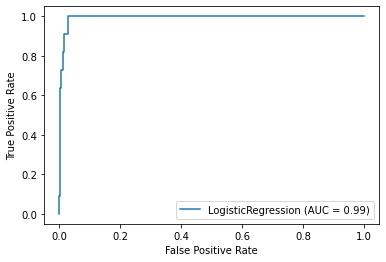

TRAIN: [   0    1    2 ... 2684 2685 2686] TEST: [1073 1074 1075 1076 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101
 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115
 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129
 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143
 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157
 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171
 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185
 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199
 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213
 1214 1215 1216 1217 1218 1219 1220 1223 1224 1225 1226 1227 1228 1229
 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243
 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257
 1258 1259 1260 1261 1262 12

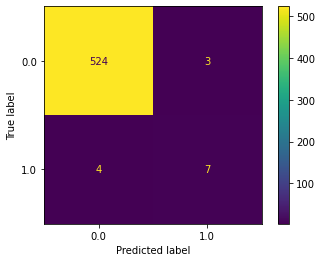

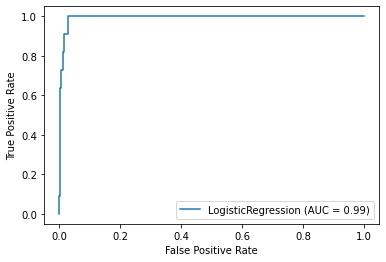

TRAIN: [   0    1    2 ... 2684 2685 2686] TEST: [1472 1531 1572 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626
 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640
 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654
 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668
 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682
 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696
 1697 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710
 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724
 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738
 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752
 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766
 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780
 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793 1794
 1795 1796 1797 1798 1799 18

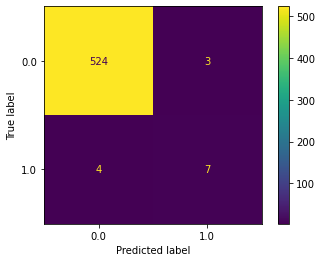

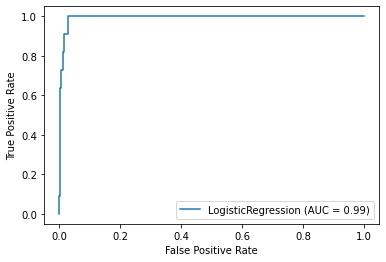

TRAIN: [   0    1    2 ... 2151 2152 2153] TEST: [1929 1940 2035 2036 2154 2155 2156 2157 2158 2159 2160 2161 2162 2163
 2164 2165 2166 2167 2168 2169 2170 2171 2172 2173 2174 2175 2176 2177
 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191
 2192 2193 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204 2205
 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219
 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233
 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247
 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261
 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275
 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289
 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 2301 2302 2303
 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317
 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328 2329 2330 2331
 2332 2333 2334 2335 2336 23

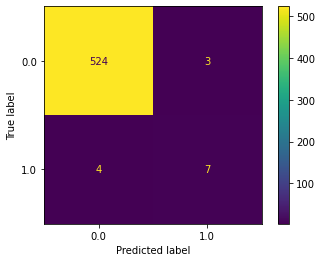

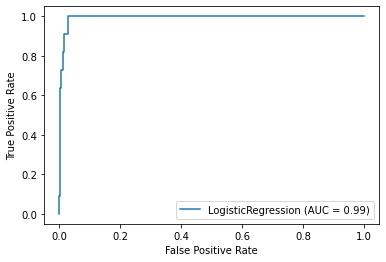

In [166]:
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,precision_score,mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba_list = []
y_pred_list = []
y_pred_index_list = []
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X[result2], y):
    print("TRAIN:", train_index, "TEST:", test_index)
    model = LogisticRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)
    print('Acurácia: ', model.score(x_test, y_test))
    y_pred_list.append(y_pred)
    y_pred_proba_list.append(y_pred_proba)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    precisao = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/precisao) + 1/(recall))
    print('Precisão:',precisao) 
    print('Recal:',recall) 
    print('F1:',f1) 
    
    plot_confusion_matrix(model, x_test, y_test)  
    plt.show()  

    metrics.plot_roc_curve(model, x_test, y_test)  
    plt.show() 

In [167]:
id = []
for i in y_pred_index_list:
    for j in i:
        print(j[1])
        id.append(j[1])

In [168]:
probs = []
for i in y_pred_proba_list:
    for j in i:
        print(j[1])
        probs.append(j[1])

4.540572235698002e-07
1.40582265095202e-06
4.9011765862600935e-06
3.917131669344921e-06
4.141167704596144e-07
7.801409746491237e-07
8.450325441513235e-05
4.141167704596144e-07
3.415132441937849e-05
5.9605002705651195e-06
2.37074467314895e-07
1.40582265095202e-06
0.007190164151278395
2.2119406893490602e-06
4.036974305127978e-05
0.005985392144145916
1.1386438681510875e-06
6.350816198027295e-05
3.3894293853156852e-06
9.660983229376545e-07
1.8712527028736744e-06
4.692678258367358e-06
5.436652018750669e-06
4.965294341201111e-07
0.06506711288403111
1.2143611773658857e-06
1.5156600308916593e-06
6.145957548032636e-06
1.3191876963564328e-06
1.3432477722411481e-06
4.772387835773481e-06
1.0468591140188043e-05
0.0020739489498141856
0.5547198451024268
1.1878117947364888e-07
3.969739379413965e-06
1.774386887643429e-05
0.4247194773723427
1.7835884007950283e-06
5.793634555567353e-06
5.100823696852998e-07
5.8909332636390025e-05
6.145957548032636e-06
1.0561309590033347e-05
2.4906025526979033e-06
0.00037

4.6420039507259055e-06
0.0010980652221953898
5.793634555567353e-06
1.1816961417768052e-06
3.865417151913982e-06
0.17112117364369053
0.00015773093272614534
5.112832150075409e-07
5.452584042813947e-07
0.00017271149430810647
1.8712527028736744e-06
5.487269289708048e-06
4.444530898095717e-06
1.4913298266492431e-06
4.352608615159075e-06
3.682042697227842e-06
1.8712527028736744e-06
2.4906025526979033e-06
4.0843763407891e-06
5.0949847700599944e-05
4.895328982015606e-07
8.172788452275483e-07
0.0024255011810184702
9.114508694691408e-06
1.8712527028736744e-06
4.692678258367358e-06
0.2797403919461864
1.5198638861218145e-06
1.164640587248498e-05
4.617349054434498e-06
1.698914954640652e-05
1.6618297778606662e-06
4.540572235698002e-07
1.40582265095202e-06
4.9011765862600935e-06
3.917131669344921e-06
4.141167704596144e-07
7.801409746491237e-07
8.450325441513235e-05
4.141167704596144e-07
3.415132441937849e-05
5.9605002705651195e-06
2.37074467314895e-07
1.40582265095202e-06
0.007190164151278395
2.21194

In [169]:
probs = pd.DataFrame(probs)
probs.columns = ['Prob de Default']
probs

,Prob de Default
0,4.540572e-07
1,1.405823e-06
2,4.901177e-06
3,3.917132e-06
4,4.141168e-07
...,...
2685,1.519864e-06
2686,1.164641e-05
2687,4.617349e-06
2688,1.698915e-05


# Regressão Logística com Leave one out

In [170]:
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X[result2] , y, test_size = p, random_state = 2)

Precisão: 0.7
Recal: 0.6363636363636364
F1: 0.6666666666666666


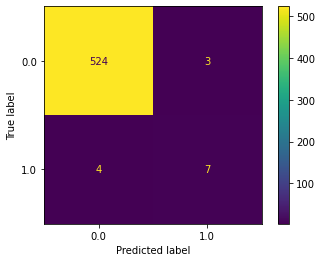

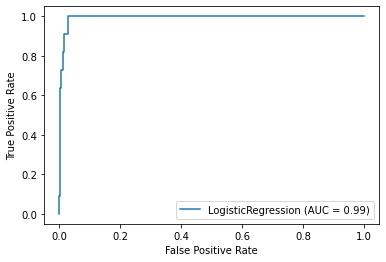

Precisão: 0.7
Recal: 0.6363636363636364
F1: 0.6666666666666666


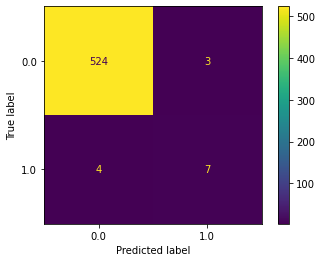

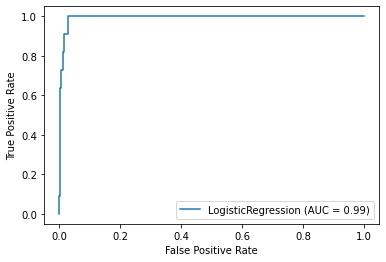

Precisão: 0.7
Recal: 0.6363636363636364
F1: 0.6666666666666666


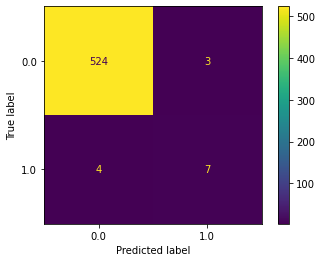

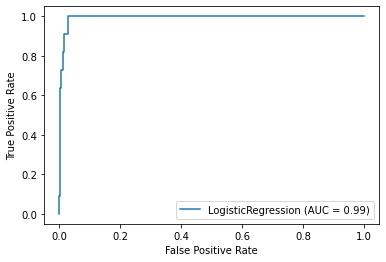

Precisão: 0.7
Recal: 0.6363636363636364
F1: 0.6666666666666666


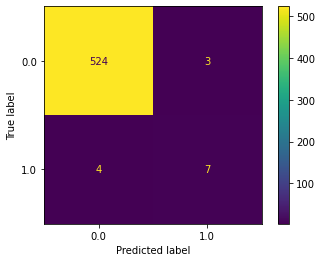

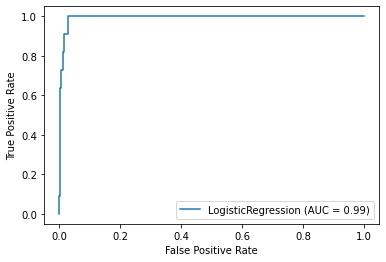

Precisão: 0.7
Recal: 0.6363636363636364
F1: 0.6666666666666666


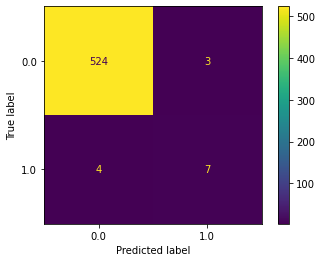

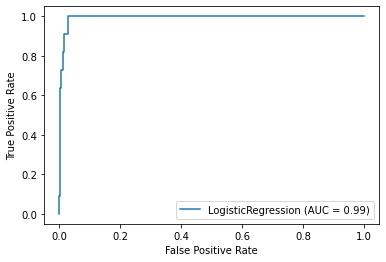

In [171]:
from sklearn.model_selection import StratifiedKFold,KFold,cross_validate, train_test_split,LeaveOneOut,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,precision_score,mean_absolute_error
import matplotlib.pyplot as plt

y_pred_proba_list = []
y_pred_list = []
y_pred_index_list = []

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X[result2], y):
    cv = LeaveOneOut()
    model = LogisticRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_list.append(y_pred)
    y_pred_proba_list.append(y_pred_proba)
    scores = cross_val_score(model, X[result2], y, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)    

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    precisao = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/precisao) + 1/(recall))
    print('Precisão:',precisao) 
    print('Recal:',recall) 
    print('F1:',f1) 

    plot_confusion_matrix(model, x_test, y_test)  
    plt.show()  

    metrics.plot_roc_curve(model, x_test, y_test)  
    plt.show()     